# Division de generos musicales

In [1]:
import json
from unidecode import unidecode

In [2]:
with open("data/raw.json", "r") as f:
    raw = json.load(f)

In [3]:
changeMap = {}

for genre in ["cumbia villera", "trap argentino", "cuarteto", "previa", "argentine hip hop", "rkt", "cumbia 420", "rap underground argentino", "r&b argentino"]:
    changeMap[genre] = "Musica urbana - Argentino"
for genre in ["urbano latino", "trap latino", "reggaeton", "reggaeton flow", "urbano chileno", "urbano espanol", "reggaeton colombiano", "mambo chileno", "latin hip hop", "trap triste", "reggaeton chileno", "rap latina", "flamenco urbano", "cumbia uruguaya", "trap chileno", "latin viral rap", "trap boricua", "drill espanol", "r&b en espanol", "trap venezolano", "spanish hip hop", "trap", "drill chileno", "plena uruguaya", "rap uruguayo", "neoperreo", "urbano mexicano", "memphis hip hop", "cumbia paraguaya", "latin arena pop", "dembow", "dembow dominicano", "rap conciencia", "rap canario", "rap dominicano", "venezuelan hip hop", "rap anime"]:
    changeMap[genre] = "Musica urbana - Latino"
for genre in ["folklore argentino","cumbia santafesina","folclore salteno","guaracha santiaguena","folclore santiagueno","cantautora argentina","zamba","folklore nuevo argentino","nuevo folklore argentino"]:
    changeMap[genre] = "Folklore"
for genre in ["cumbia pop", "argentine telepop", "argentine rock", "pop argentino", "argentine indie"]:
    changeMap[genre] = "Pop/Rock - Argentino"
for genre in ["latin pop", "latin viral pop", "panamanian pop", "colombian pop", "pop venezolano", "pop reggaeton", "pop flamenco", "pop romantico", "cancion melodica"]:
    changeMap[genre] = "Pop - Latino"
for genre in ["tech house", "uk tech house", "latin tech house", "electronica venezuela", "bass house", "house", "italian tech house"]:
    changeMap[genre] = "Electronica"
for genre in ["musica mexicana", "norteno", "banda", "corrido", "ranchera", "grupera", "sierreno", "sad sierreno", "corridos tumbados", "norteno-sax", "cumbia sonidera", "mexican rock-and-roll", "gruperas inmortales", "tropical", "mariachi", "bolero", "tejano", "musica chihuahuense", "tex-mex", "mexican pop", "grupero romantico", "duranguense"]:
    changeMap[genre] = "Musica mexicana"

def kill(normalized, one, two):
    if one in normalized and two in normalized:
        normalized.remove(two)
    return normalized

def normalizeGenres(genres):
    normalized = set()
    if len(genres) == 0:
        return ["Other"]
    for genre in genres:
        if genre in changeMap:
            normalized.add(changeMap[genre])
    if len(genres) == 0:
        return ["Other"]

    normalized = kill(normalized, "Pop - Latino", "Musica mexicana")
    normalized = kill(normalized, "Musica urbana - Argentino", "Musica urbana - Latino")
    normalized = kill(normalized, "Pop/Rock - Argentino", "Pop - Latino")
    normalized = kill(normalized, "Folklore", "Musica urbana - Argentino")
    normalized = kill(normalized, "Folklore", "Pop/Rock - Argentino")

    return list(normalized)

In [4]:
artists = {}
for _artist in raw:
    _id = _artist["id"]
    artists[_id] = dict(_artist)
    artists[_id]["genres"] = normalizeGenres(artists[_id]["genres"])

In [5]:
for id, artist in artists.items():
    if len(artist["genres"]) > 1:
        genre_idx = int(input(f"{artist['name']}\n\t1. {artist['genres'][0]}\n\t2. {artist['genres'][1]}\nChoose a genre: "))-1
        selected = artists[id]["genres"][genre_idx]
        artists[id]["genres"] = [selected]

Luck Ra
	1. Musica urbana - Argentino
	2. Pop/Rock - Argentino
Choose a genre:  1
Bizarrap
	1. Musica urbana - Argentino
	2. Pop - Latino
Choose a genre:  1
Feid
	1. Pop - Latino
	2. Musica urbana - Latino
Choose a genre:  1
Ulises Bueno
	1. Musica urbana - Argentino
	2. Pop/Rock - Argentino
Choose a genre:  1
Ovy On The Drums
	1. Pop - Latino
	2. Musica urbana - Latino
Choose a genre:  2
Alan Gomez
	1. Musica urbana - Argentino
	2. Pop/Rock - Argentino
Choose a genre:  1
The La Planta
	1. Musica urbana - Argentino
	2. Pop/Rock - Argentino
Choose a genre:  1
WOS
	1. Musica urbana - Argentino
	2. Pop/Rock - Argentino
Choose a genre:  2
Rodrigo
	1. Musica urbana - Argentino
	2. Pop/Rock - Argentino
Choose a genre:  1
El Villano
	1. Musica urbana - Argentino
	2. Pop/Rock - Argentino
Choose a genre:  1
Hernan y La Champion's Liga
	1. Musica urbana - Argentino
	2. Pop/Rock - Argentino
Choose a genre:  1
Tainy
	1. Pop - Latino
	2. Musica urbana - Latino
Choose a genre:  2
Mau y Ricky
	1. Pop

In [8]:
with open("data/raw2.json", "w") as f:
    json.dump(artists, f)

In [19]:
for id, artist in sorted(artists.items(), key=lambda x: x[0].lower()):
    if len(artist['genres']) == 0:
        print(f"Other\t{id}")
    else:
        print(f"{artist['genres'][0]}\t{id}")

Other	002HSjuWsGMinkXTa7JcRp
Musica urbana - Latino	00me4Ke1LsvMxt5kydlMyU
Musica urbana - Latino	00XhexlJEXQstHimpZN910
Other	016py69QzREL4xM8r2anwu
Musica mexicana	01brs471Oes6kMnkVJBfGG
Other	01DT92d7V8fG6pRNSd8yaM
Musica urbana - Argentino	01m2XZ7m7rAz6KY3scTdaV
Musica mexicana	01rgao9OzfBm2BOHWJpi1Y
Musica urbana - Argentino	02AwBRpMnDrozfJcOnFOaY
Other	02fJf70lwCehgEMfh6gFix
Other	02jiOIXgu27Kds0Gpd6Fpq
Folklore	02lGxcSZaGuHiJryv6vkOY
Musica urbana - Latino	03Enzet8KLMkjdeQnbqbmn
Other	03fXtSW7LEjurDMGLr672u
Other	03ojdQidPtScdEq8KU2V9K
Musica mexicana	03Yb3iBy9GCifXiATEFcit
Other	0428b0mYjLWfL8hW74a3CI
Other	04gHmjV4hmiIrT3PHXlTbZ
Musica mexicana	04mzq9GH08zOBRdV2gzmXm
Folklore	04P5kEdUJHjng2DzTXhy1C
Musica urbana - Argentino	04TVfWdJWbfH0FOT2zA1Tg
Musica urbana - Argentino	04tXa59qDOMrlU6mWs6aqT
Other	04vVNmaKhinxxW4eCJIyX7
Musica urbana - Argentino	04XdCDDrPnnqidaVBTOQjt
Electronica	052B9SONfhoScw7dgYWw5o
Pop/Rock - Argentino	059ysTnWcrm4yFwTr0NDjc
Other	05BW1vJRGaUQTstTCDAloS

# Homofilia posta

In [173]:
import networkx as nx
import csv
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

green_spotify = "#1DB954"
black_spotify = "#121212" 
grey_spotify = "#535353"
white_spotify = "#b3b3b3"

In [174]:
#
# mapa = {tipo1: {tipo1:0, tipo2:0}, tipo2:{tipo1:0, tipo2:0}}
#
def homofilia(grafo, discriminante, mapa):
    attr = lambda nodo: grafo.nodes[nodo][discriminante]
    edges_map = {x:0 for x in mapa.keys()}
    for v in grafo:
        mapa["General"][attr(v)] += 1
        edges_map["General"] += 1
        for w in grafo.neighbors(v):
            edges_map[attr(v)] += 1
            mapa[attr(v)][attr(w)] += 1

    for tipo, edges in edges_map.items():
        for tipoj in mapa[tipo]:
            mapa[tipo][tipoj] /= edges

    return mapa

In [175]:
network = nx.DiGraph() 
with open("data/nodes2.csv", "r") as nodes, open("data/edges.csv", "r") as edges:
    reader = csv.reader(nodes, delimiter=',')
    next(reader, None) # skip header
    for row in reader:
        id = row[0]
        network.add_node(id, name=row[1], popularity=row[2], sex=row[5], genre=row[6])
    reader = csv.reader(edges, delimiter=';')
    next(reader, None)
    for source, target in reader:
        network.add_edge(source, target)

In [177]:
tipos = ["Masculino", "Femenino", "Grupo musical"]
mapa = {tipo_i:{tipo_j:0 for tipo_j in tipos} for tipo_i in tipos+["General"]}
homofilia(network, "sex", mapa)

{'Masculino': {'Masculino': 0.8289309298590041,
  'Femenino': 0.04684990183830091,
  'Grupo musical': 0.12421916830269498},
 'Femenino': {'Masculino': 0.5104690117252931,
  'Femenino': 0.3157453936348409,
  'Grupo musical': 0.173785594639866},
 'Grupo musical': {'Masculino': 0.4388135593220339,
  'Femenino': 0.05440677966101695,
  'Grupo musical': 0.5067796610169492},
 'General': {'Masculino': 0.7242351046698873,
  'Femenino': 0.08655394524959742,
  'Grupo musical': 0.1892109500805153}}

In [297]:
colors = [green_spotify, white_spotify, grey_spotify]
font_colors = [black_spotify, black_spotify, white_spotify]
def plot_homofilia(mapa, colors=colors, font_colors=font_colors, title="sexo"):
    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(7.5, 4.8))
    df = pd.DataFrame(mapa).T
    
    df.plot(kind='barh', stacked=True, figsize=(10, 6), ax=ax, color=colors)
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_title(f'Homofilia por {title} del artista')
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)

    i = 0
    for c in ax.containers:
        label = c.get_label()
        labels = []
        for x in df[label]:
            if x >= 0.03:
                labels.append(str(round(x, 2)))
            else:
                labels.append("")             
        # add the annotation
        ax.bar_label(c, labels=labels, label_type='center', fontweight='bold', color=font_colors[i], fontsize=8)
        i+=1
    ax.set_xticks([])

    plt.show()

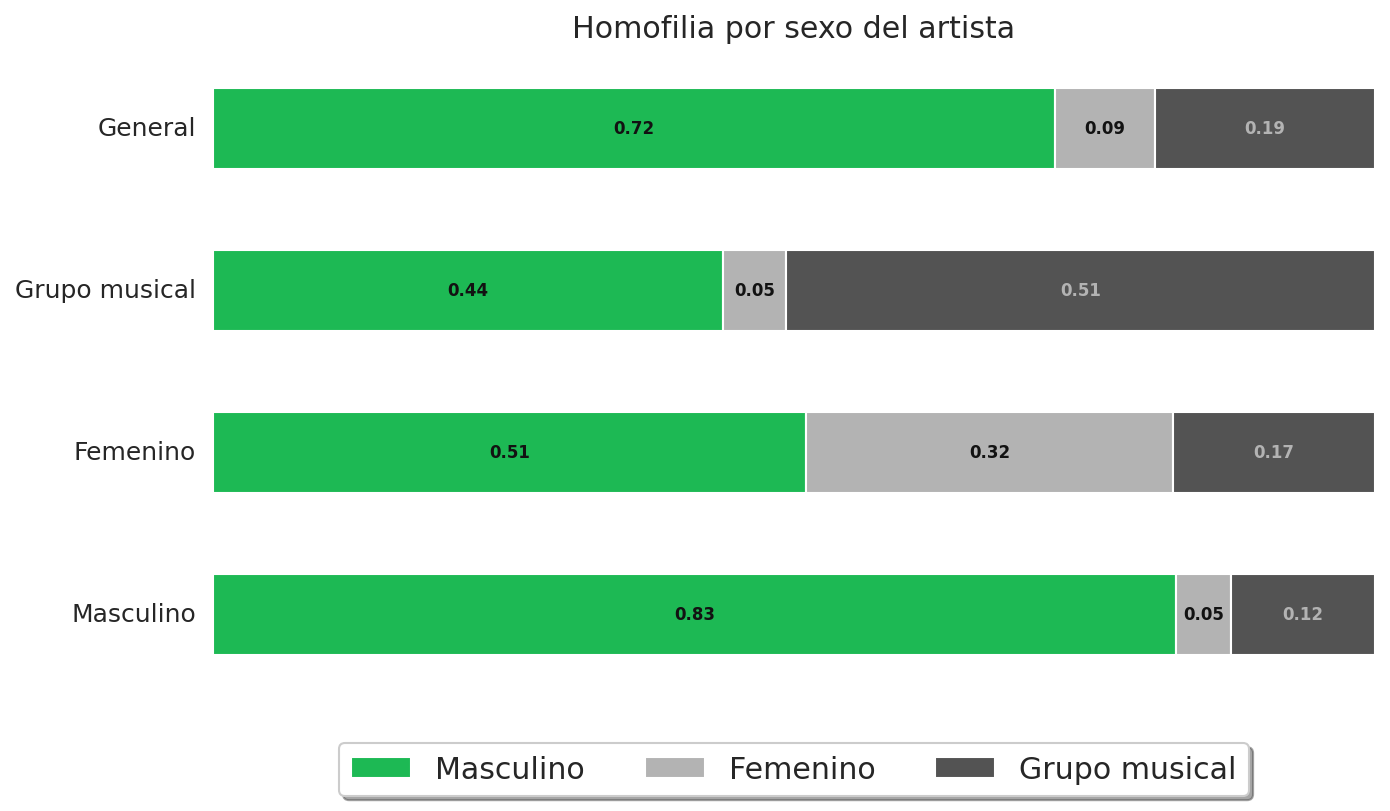

In [179]:
plot_homofilia(mapa)

In [187]:
tipos = ["Musica urbana - Latino", "Pop - Latino", "Musica mexicana", "Musica urbana - Argentino", "Pop/Rock - Argentino", "Other", "Folklore", "Electronica"]
mapa = {tipo_i:{tipo_j:0 for tipo_j in tipos} for tipo_i in tipos+["General"]}
homofilia(network, "genre", mapa)

{'Musica urbana - Latino': {'Musica urbana - Latino': 0.8137268747352069,
  'Pop - Latino': 0.02626747634514899,
  'Musica mexicana': 0.0031069058042649342,
  'Musica urbana - Argentino': 0.03544697076684084,
  'Pop/Rock - Argentino': 0.005507696653015111,
  'Other': 0.11297839288236125,
  'Folklore': 0.002965682813161983,
  'Electronica': 0.0},
 'Pop - Latino': {'Musica urbana - Latino': 0.18622696411251213,
  'Pop - Latino': 0.5994180407371484,
  'Musica mexicana': 0.07856450048496605,
  'Musica urbana - Argentino': 0.0009699321047526673,
  'Pop/Rock - Argentino': 0.01745877788554801,
  'Other': 0.1037827352085354,
  'Folklore': 0.013579049466537343,
  'Electronica': 0.0},
 'Musica mexicana': {'Musica urbana - Latino': 0.0011498658489842851,
  'Pop - Latino': 0.026063625910310462,
  'Musica mexicana': 0.9543886546569567,
  'Musica urbana - Argentino': 0.0,
  'Pop/Rock - Argentino': 0.0,
  'Other': 0.018397853583748562,
  'Folklore': 0.0,
  'Electronica': 0.0},
 'Musica urbana - Argen

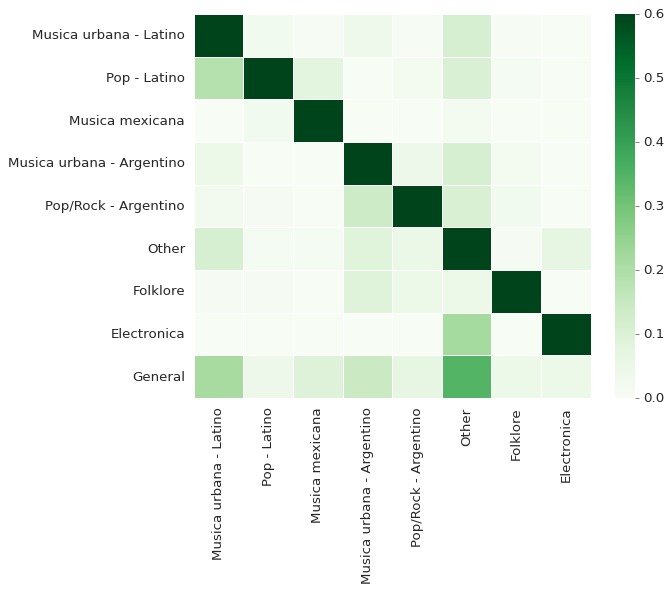

In [208]:
df = pd.DataFrame(mapa).T

ax = sns.heatmap(df, linewidth=0.5, cmap="Greens")
ax.collections[0].set_clim(0, 0.60)
plt.show()

## Por popularidad

In [227]:
popularity = []
for _, attr in network.nodes(data=True):
    popularity.append(int(attr["popularity"]))

popularity = np.array(popularity)

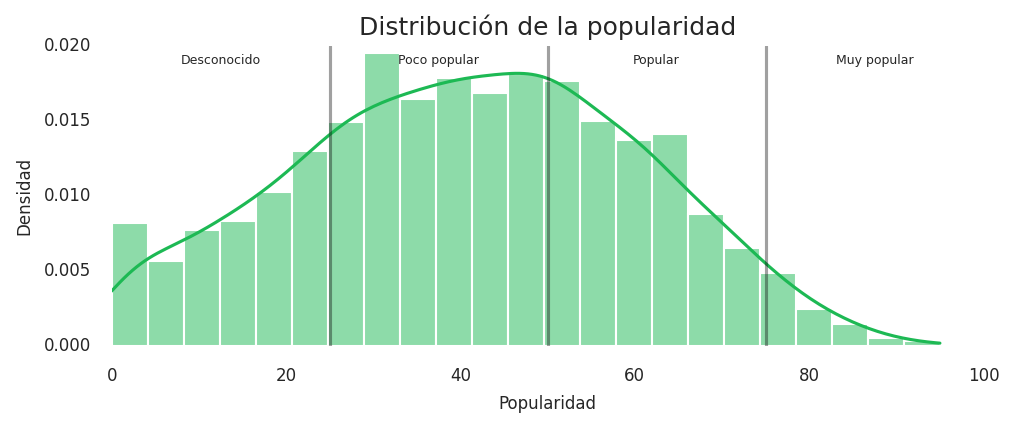

In [302]:
def add_vline(x, label):
    plt.axvline(x, color=black_spotify, alpha=0.4)
    plt.text(x+25/2,0.019, label, rotation=0, fontsize=6, ha='center', va='center')

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(7.5, 2.5))
sns.histplot(popularity, kde=True, ax=ax, stat="density", color=green_spotify)
ax.set_title('Distribución de la popularidad', fontsize=12)
ax.set_xlabel("Popularidad", fontsize=8)
ax.set_ylabel("Densidad", fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(False)

plt.text(25/2,0.019, "Desconocido", rotation=0, fontsize=6, ha='center', va='center')
add_vline(25, "Poco popular")
add_vline(50, "Popular")
add_vline(75, "Muy popular")
#add_vline(99.9, "")

plt.show()

In [278]:
def categorizar_popularidad(p):
    p = int(p)
    if p < 25:
        return "Desconocido"
    if p < 50:
        return "Poco popular"
    if p < 75:
        return "Popular"
    return "Muy popular"
for node in network:
    network.nodes[node]["cat-popularity"] = categorizar_popularidad(network.nodes[node]["popularity"])

In [280]:
tipos = ["Desconocido", "Poco popular", "Popular", "Muy popular"]
mapa_p = {tipo_i:{tipo_j:0 for tipo_j in tipos} for tipo_i in tipos+["General"]}
homofilia(network, "cat-popularity", mapa_p)

{'Desconocido': {'Desconocido': 0.5327503429355281,
  'Poco popular': 0.4134087791495199,
  'Popular': 0.05178326474622771,
  'Muy popular': 0.00205761316872428},
 'Poco popular': {'Desconocido': 0.1692047377326565,
  'Poco popular': 0.679236161469664,
  'Popular': 0.15075336395133349,
  'Muy popular': 0.0008057368463459834},
 'Popular': {'Desconocido': 0.0211864406779661,
  'Poco popular': 0.3074387947269303,
  'Popular': 0.6353107344632768,
  'Muy popular': 0.03606403013182674},
 'Muy popular': {'Desconocido': 0.001633097441480675,
  'Poco popular': 0.01905280348394121,
  'Popular': 0.5721284703320632,
  'Muy popular': 0.40718562874251496},
 'General': {'Desconocido': 0.21900161030595813,
  'Poco popular': 0.428341384863124,
  'Popular': 0.3132045088566828,
  'Muy popular': 0.039452495974235106}}

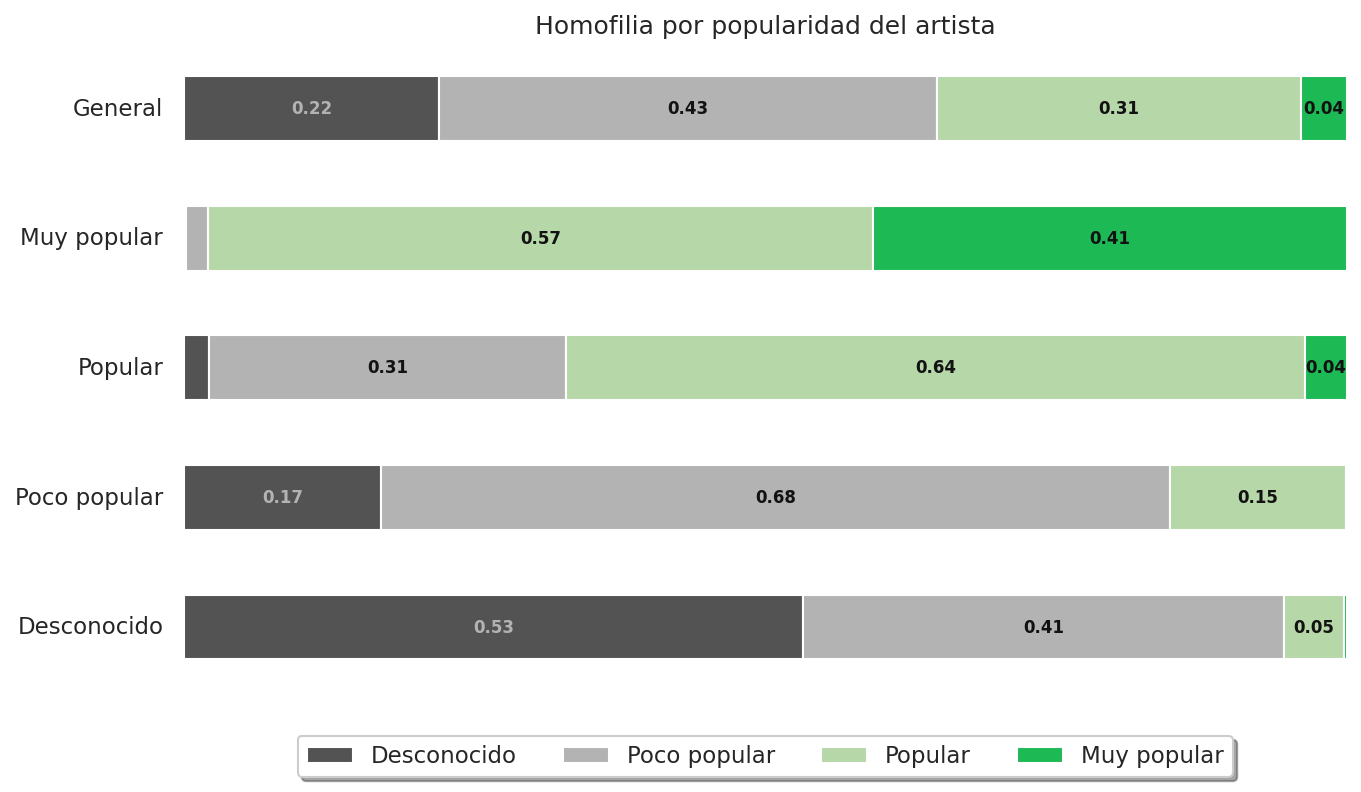

In [298]:
_colors = [grey_spotify, white_spotify, "#b6d7a8", green_spotify]
_font_colors = [white_spotify, black_spotify, black_spotify, black_spotify]

plot_homofilia(mapa_p, _colors, _font_colors, "popularidad")

In [294]:
np.quantile(popularity, [0.25, 0.5, 0.75])

array([27., 41., 55.])

# Coeficiente de Clustering

In [305]:
coef_clust = nx.clustering(network)

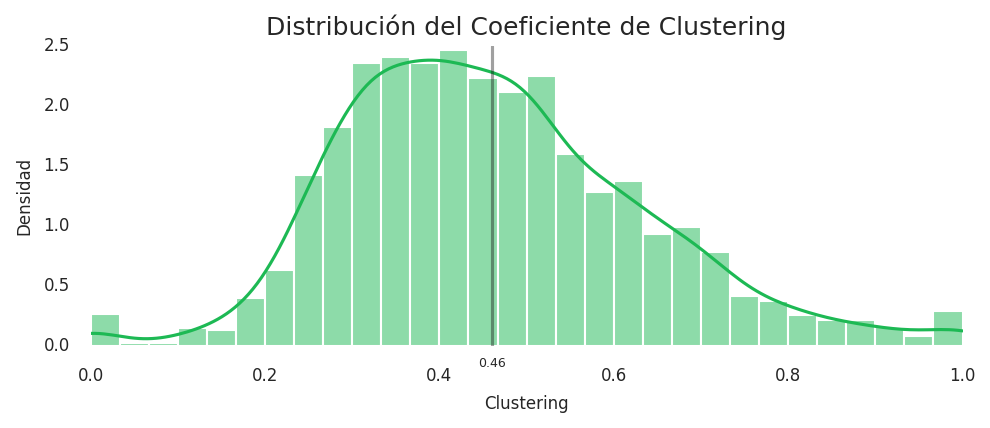

In [320]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(7.5, 2.5))
sns.histplot(list(coef_clust.values()), kde=True, ax=ax, stat="density", color=green_spotify)
ax.set_title('Distribución del Coeficiente de Clustering', fontsize=12)
ax.set_xlabel("Clustering", fontsize=8)
ax.set_ylabel("Densidad", fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

mean = np.mean(list(coef_clust.values()))
plt.axvline(mean, color=black_spotify, alpha=0.4)
plt.text(mean, -0.15, str(round(mean, 2)), rotation=0, fontsize=6, ha='center', va='center')


ax.grid(False)

plt.show()

In [321]:
mean

0.46048742452894187